In [2]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [3]:
df = pd.read_csv('GfK Pet Food Data Exercise.csv')

In [4]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 11 columns):
Product                      2693 non-null object
Country                      2693 non-null object
Conglomerate                 2693 non-null object
Food Form                    2693 non-null object
Preservation                 2693 non-null object
Natural                      2693 non-null object
Date                         2693 non-null object
Year                         2693 non-null int64
Quarter                      2693 non-null object
Sum of Total Weight (lbs)    2693 non-null int64
Sum of Sales Value USD       2693 non-null int64
dtypes: int64(3), object(8)
memory usage: 231.5+ KB


,Product,Country,Conglomerate,Food Form,Preservation,Natural,Date,Year,Quarter,Sum of Total Weight (lbs),Sum of Sales Value USD
0,PETFOOD,United States of America,BIG HEART PET (DEL MONTE),DRY,OTHER,NATURAL,1/1/2011,2011,1Q11,3297231,7746056
1,PETFOOD,United States of America,BIG HEART PET (DEL MONTE),DRY,OTHER,NATURAL,2/1/2011,2011,1Q11,2757459,6585410
2,PETFOOD,United States of America,BIG HEART PET (DEL MONTE),DRY,OTHER,NATURAL,3/1/2011,2011,1Q11,2988629,7065595
3,PETFOOD,United States of America,BIG HEART PET (DEL MONTE),DRY,OTHER,NATURAL,4/1/2011,2011,2Q11,3142807,7322146
4,PETFOOD,United States of America,BIG HEART PET (DEL MONTE),DRY,OTHER,NATURAL,5/1/2011,2011,2Q11,3519402,8341621


In [5]:
#Renaming data for ease of use
df = df.rename(columns={"Sum of Total Weight (lbs)": "Weight", 
                            "Sum of Sales Value USD": "Value"})

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 11 columns):
Product         2693 non-null object
Country         2693 non-null object
Conglomerate    2693 non-null object
Food Form       2693 non-null object
Preservation    2693 non-null object
Natural         2693 non-null object
Date            2693 non-null object
Year            2693 non-null int64
Quarter         2693 non-null object
Weight          2693 non-null int64
Value           2693 non-null int64
dtypes: int64(3), object(8)
memory usage: 231.5+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 11 columns):
Product         2693 non-null object
Country         2693 non-null object
Conglomerate    2693 non-null object
Food Form       2693 non-null object
Preservation    2693 non-null object
Natural         2693 non-null object
Date            2693 non-null datetime64[ns]
Year            2693 non-null int64
Quarter         2693 non-null object
Weight          2693 non-null int64
Value           2693 non-null int64
dtypes: datetime64[ns](1), int64(3), object(7)
memory usage: 231.5+ KB


In [9]:
df["Value"] = df["Value"].astype(float)
df["Weight"] = df["Weight"].astype(float)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2693 entries, 0 to 2692
Data columns (total 11 columns):
Product         2693 non-null object
Country         2693 non-null object
Conglomerate    2693 non-null object
Food Form       2693 non-null object
Preservation    2693 non-null object
Natural         2693 non-null object
Date            2693 non-null datetime64[ns]
Year            2693 non-null int64
Quarter         2693 non-null object
Weight          2693 non-null float64
Value           2693 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 231.5+ KB


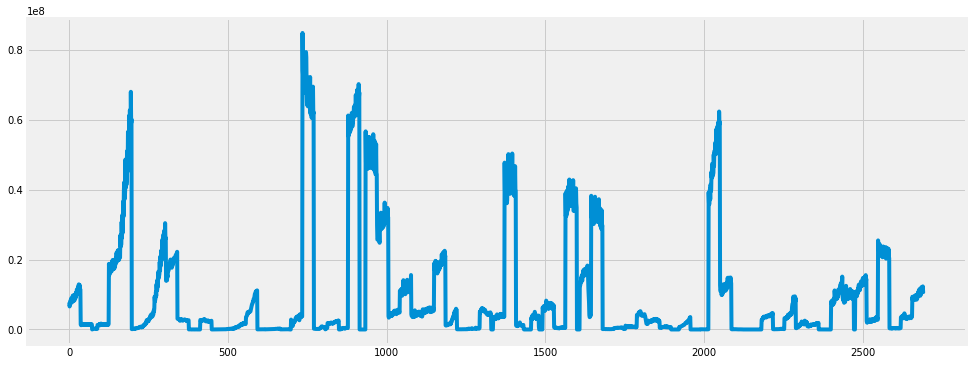

In [11]:
V = df['Value']
V.plot(figsize=(15, 6))
plt.show()

In [12]:
#Sum of value on each day
sum_val = df.groupby('Date')['Value'].sum()
sum_weight = df.groupby('Date')['Weight'].sum()

In [13]:
print(sum_val)

Date
2011-01-01    670179388.0
2011-02-01    590173225.0
2011-03-01    592995266.0
2011-04-01    589845285.0
2011-05-01    665839396.0
2011-06-01    592834692.0
2011-07-01    670721681.0
2011-08-01    602117891.0
2011-09-01    604500528.0
2011-10-01    695417904.0
2011-11-01    630853841.0
2011-12-01    733825562.0
2012-01-01    731694496.0
2012-02-01    653317781.0
2012-03-01    646714495.0
2012-04-01    648662169.0
2012-05-01    734459478.0
2012-06-01    652450534.0
2012-07-01    736547482.0
2012-08-01    675701168.0
2012-09-01    678233762.0
2012-10-01    759775042.0
2012-11-01    693431896.0
2012-12-01    715815905.0
2013-01-01    800710292.0
2013-02-01    691598382.0
2013-03-01    700749802.0
2013-04-01    696077764.0
2013-05-01    789790207.0
2013-06-01    694533202.0
2013-07-01    787027385.0
2013-08-01    703542591.0
2013-09-01    699133784.0
2013-10-01    808104121.0
2013-11-01    726083288.0
2013-12-01    742923898.0
Name: Value, dtype: float64


In [14]:
print(sum_weight)

Date
2011-01-01    362079772.0
2011-02-01    317248837.0
2011-03-01    311621146.0
2011-04-01    308871929.0
2011-05-01    348806757.0
2011-06-01    305646721.0
2011-07-01    341297519.0
2011-08-01    302068494.0
2011-09-01    305453678.0
2011-10-01    350331500.0
2011-11-01    319280232.0
2011-12-01    370008580.0
2012-01-01    368320721.0
2012-02-01    323913107.0
2012-03-01    315380705.0
2012-04-01    313333281.0
2012-05-01    355162887.0
2012-06-01    312492646.0
2012-07-01    349094925.0
2012-08-01    309204399.0
2012-09-01    311540423.0
2012-10-01    357504634.0
2012-11-01    322699886.0
2012-12-01    330589326.0
2013-01-01    366061542.0
2013-02-01    316535334.0
2013-03-01    317729595.0
2013-04-01    312852050.0
2013-05-01    352210080.0
2013-06-01    307418151.0
2013-07-01    346365803.0
2013-08-01    305691059.0
2013-09-01    304102893.0
2013-10-01    353240948.0
2013-11-01    318460925.0
2013-12-01    320950091.0
Name: Weight, dtype: float64


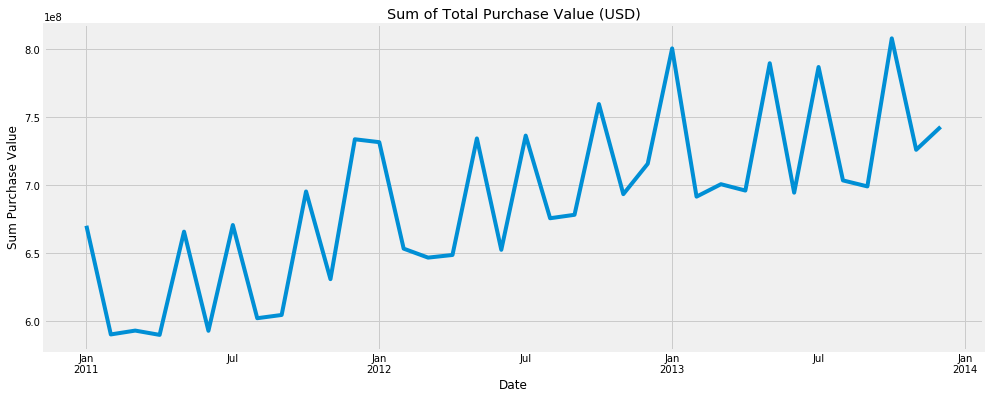

In [15]:
#Total petfood sales value
sum_val.plot(figsize=(15, 6))
plt.ylabel('Sum Purchase Value')
plt.title('Sum of Total Purchase Value (USD)')
plt.show()


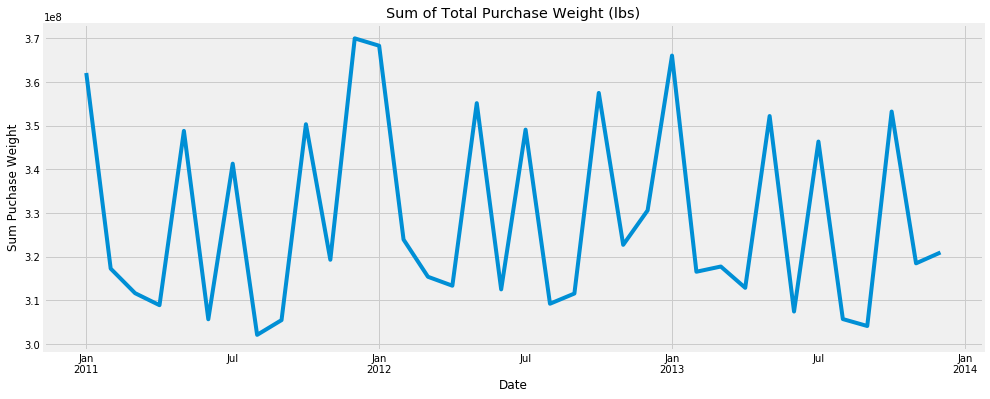

In [16]:
#Total petfood sales weight
sum_weight.plot(figsize=(15, 6))
plt.ylabel('Sum Puchase Weight')
plt.title('Sum of Total Purchase Weight (lbs)')
plt.show()


In [17]:
PricePerPound = sum_val/sum_weight

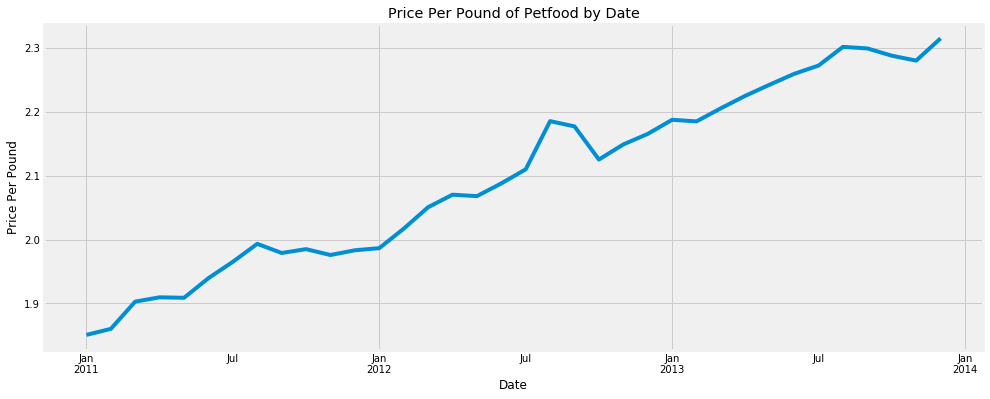

In [18]:
#Total petfood sales weight
PricePerPound.plot(figsize=(15, 6))
plt.ylabel('Price Per Pound')
plt.title('Price Per Pound of Petfood by Date')
plt.show()


In [19]:
Form = df.groupby('Date')['Food Form']

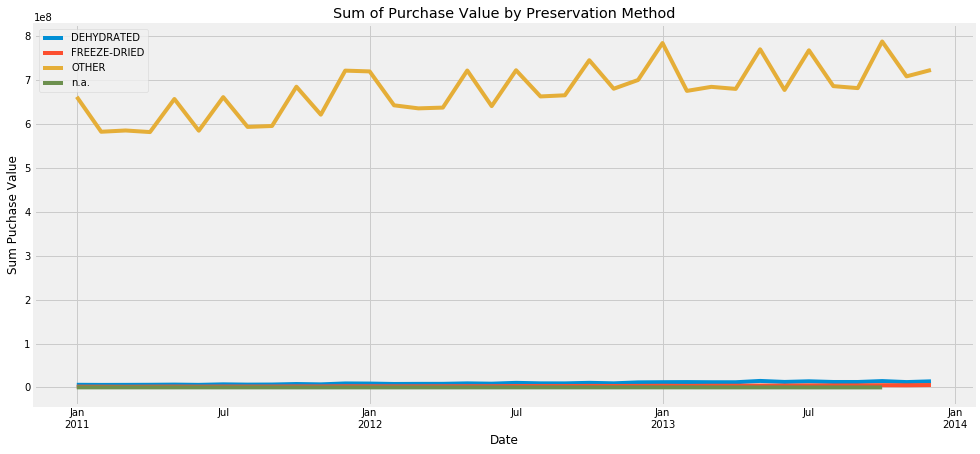

In [20]:
#Total sales value - Preservation Method
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Date','Preservation']).sum()['Value'].unstack().plot(ax=ax)
ax.legend()
ax.set_title('Sum of Purchase Value by Preservation Method')
ax.set_ylabel('Sum Puchase Value')
plt.show()

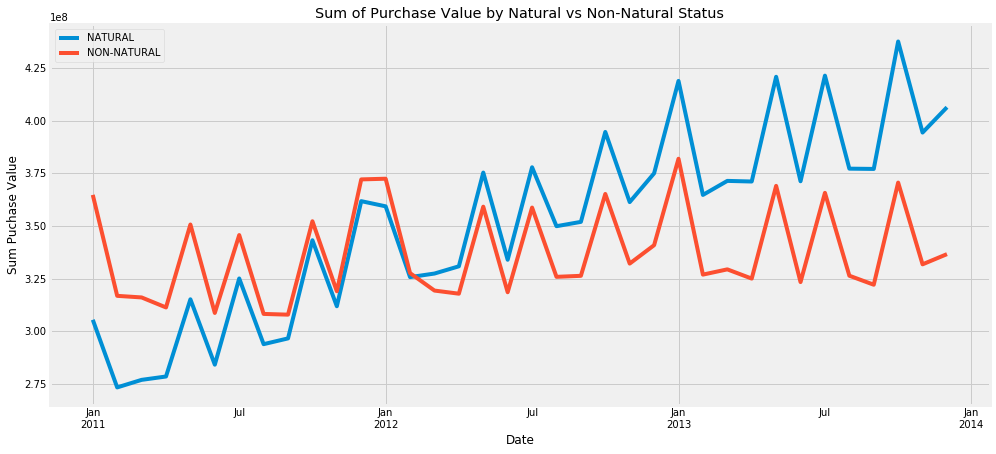

In [21]:
#Total sales value - Natural vs non-natural
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Date','Natural']).sum()['Value'].unstack().plot(ax=ax)
ax.legend()
ax.set_title('Sum of Purchase Value by Natural vs Non-Natural Status')
ax.set_ylabel('Sum Puchase Value')
plt.show()

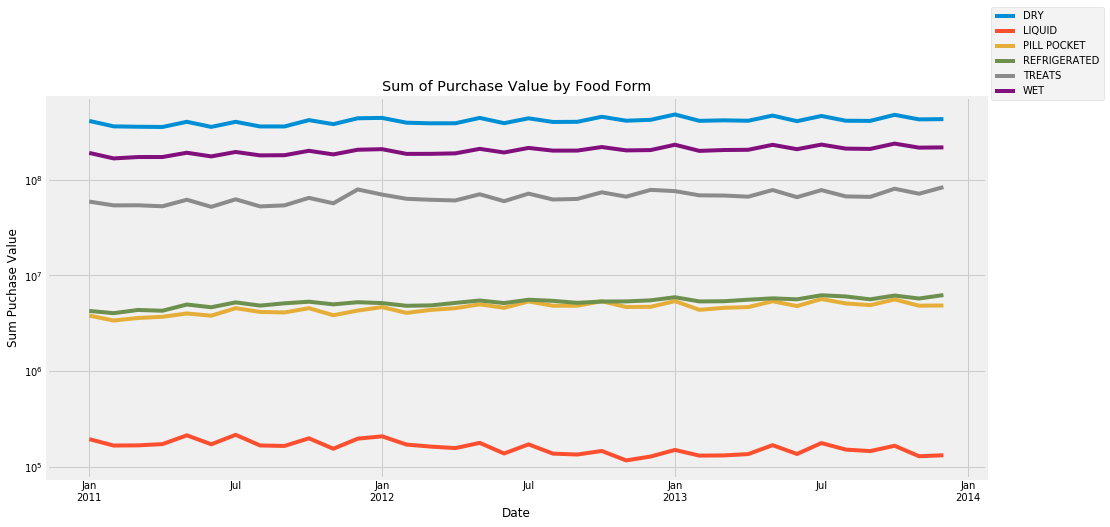

In [22]:
#TotalSales Value: By Food Form
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Date','Food Form']).sum()['Value'].unstack().plot(ax=ax)
ax.set_yscale('log')
plt.legend(bbox_to_anchor=(1,1.25), loc='upper left', ncol=1)
ax.set_title('Sum of Purchase Value by Food Form')
ax.set_ylabel('Sum Puchase Value')
plt.show()

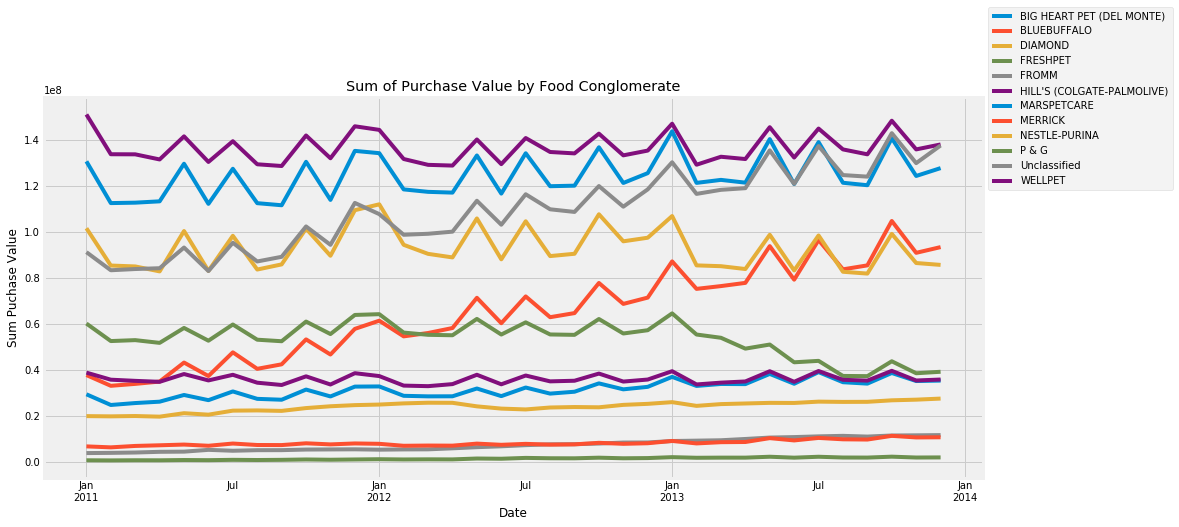

In [23]:
#Total sales value by conglomerate
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['Date','Conglomerate']).sum()['Value'].unstack().plot(ax=ax)
plt.legend(bbox_to_anchor=(1,1.25), loc='upper left', ncol=1)
ax.set_ylabel('Sum Puchase Value')
ax.set_title('Sum of Purchase Value by Food Conglomerate')
plt.show()

In [24]:
#ARIMA Time Series Analysis: Predicting 2014
import statsmodels.api as sm

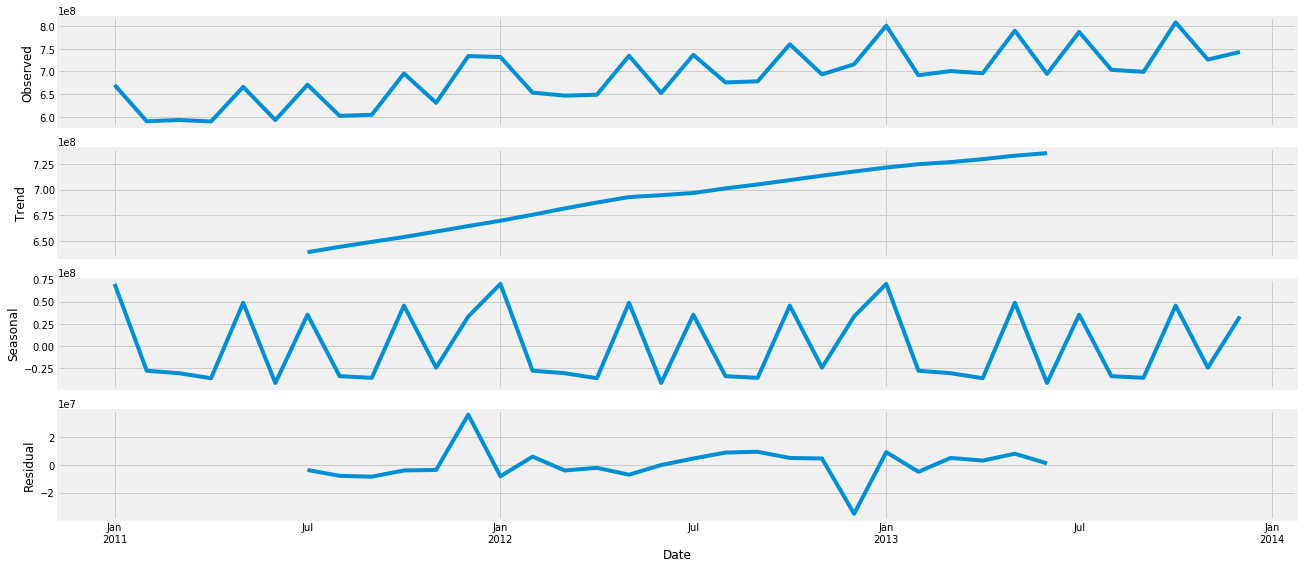

In [25]:
#Decomposing for Trend, Seasonality, and Noise
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(sum_val, model='additive')
fig = decomposition.plot()
plt.show()

In [26]:
#Finding Optimal Arimas Parameters
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [27]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sum_val,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:1526.2090987172364
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:888.0368477662404
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:884.2208088529052
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:439.99522274685177
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:1461.2064804889596
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:840.3314682199851
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1027.740896876037
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:455.97370096239825
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1325.2701712513158
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:822.6460874084372
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:857.6008794755779
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:401.3332960653073
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:1266.8432605870728
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:777.6468689577795
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:871.7017496748199
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:402.3114397086571
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:1366.5382591321882
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:855.5120285572966
ARI

In [28]:
#Optinal paremeters are ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:365.6243214858375

mod = sm.tsa.statespace.SARIMAX(sum_val,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4889      1.005     -0.486      0.627      -2.459       1.481
ar.S.L12       0.0967      0.933      0.104      0.917      -1.732       1.925
sigma2      4.889e+14   6.74e-16   7.25e+29      0.000    4.89e+14    4.89e+14


In [29]:
pred = results.get_prediction(start=pd.to_datetime('2013-06-01'), dynamic=False)
pred_ci = pred.conf_int()

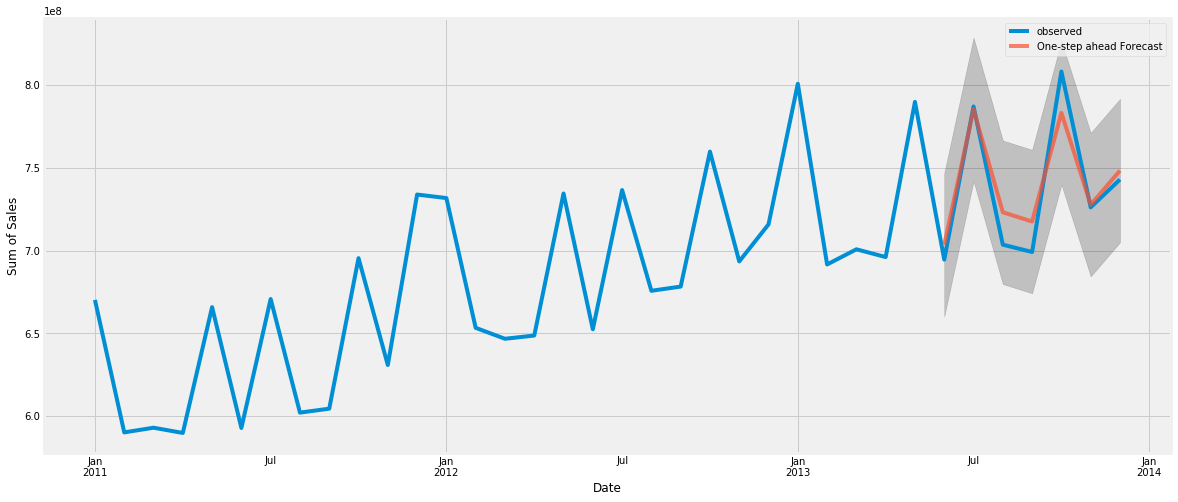

In [30]:
ax = sum_val['2011-1-1':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Sum of Sales')
plt.legend()

plt.show()

In [31]:
sum_val_forecasted = pred.predicted_mean
sum_val_observed = sum_val['2013-06-01':]

# Compute the mean square error
mse = ((sum_val_forecasted - sum_val_observed) ** 2).mean()
print('The Mean Squared Error of the forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of the forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of the forecasts is 208271413876338.94
The Root Mean Squared Error of the forecasts is 14431611.62


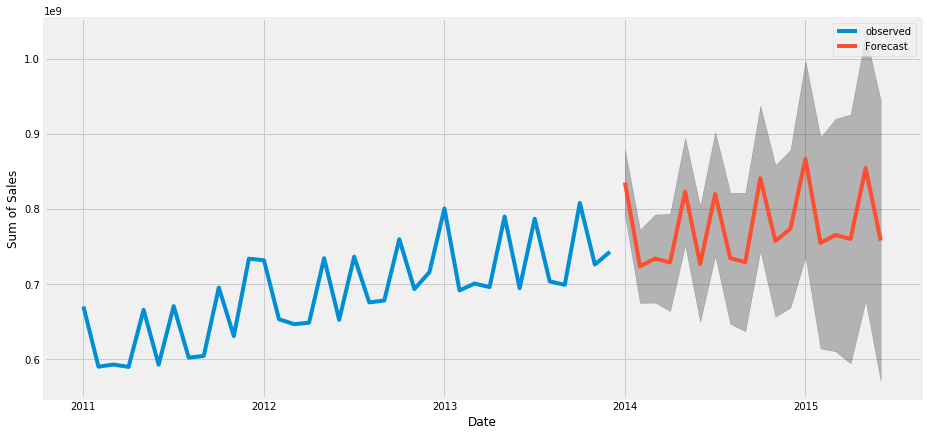

In [32]:
pred_uc = results.get_forecast(steps=18)
pred_ci = pred_uc.conf_int()
ax = sum_val.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sum of Sales')
plt.legend()
plt.show()

In [33]:
evaluation: Natural vs Non-Natural
Natural = df.loc[df['Natural'] == 'NATURAL']
Non_Natural = df.loc[df['Natural'] == 'NON-NATURAL']
Natural.shape, Non_Natural.shape

((1701, 11), (992, 11))

In [34]:
Natural = Natural.sort_values('Date')
Non_Natural = Non_Natural.sort_values('Date')

In [35]:
Natural = Natural.groupby('Date')['Value'].sum().reset_index()
Non_Natural = Non_Natural.groupby('Date')['Value'].sum().reset_index()

In [36]:
Natural = Natural.set_index('Date')
Non_Natural = Non_Natural.set_index('Date')


In [37]:
sum_val_Natural = Natural['Value'].resample('MS').mean()
sum_val_Non_Natural = Non_Natural['Value'].resample('MS').mean()

In [38]:
Natural = pd.DataFrame({'Date':sum_val_Natural.index, 'Value':sum_val_Natural.values})
Non_Natural = pd.DataFrame({'Date': sum_val_Non_Natural.index, 'Value': sum_val_Non_Natural.values})

store = Natural.merge(Non_Natural, how='inner', on='Date')
store.rename(columns={'Value_x': 'Natural_sales', 'Value_y': 'Non_Natural_sales'}, inplace=True)
store.head()

,Date,Natural_sales,Non_Natural_sales
0,2011-01-01,305452778.0,364726610.0
1,2011-02-01,273359634.0,316813591.0
2,2011-03-01,276937116.0,316058150.0
3,2011-04-01,278532424.0,311312861.0
4,2011-05-01,315173006.0,350666390.0


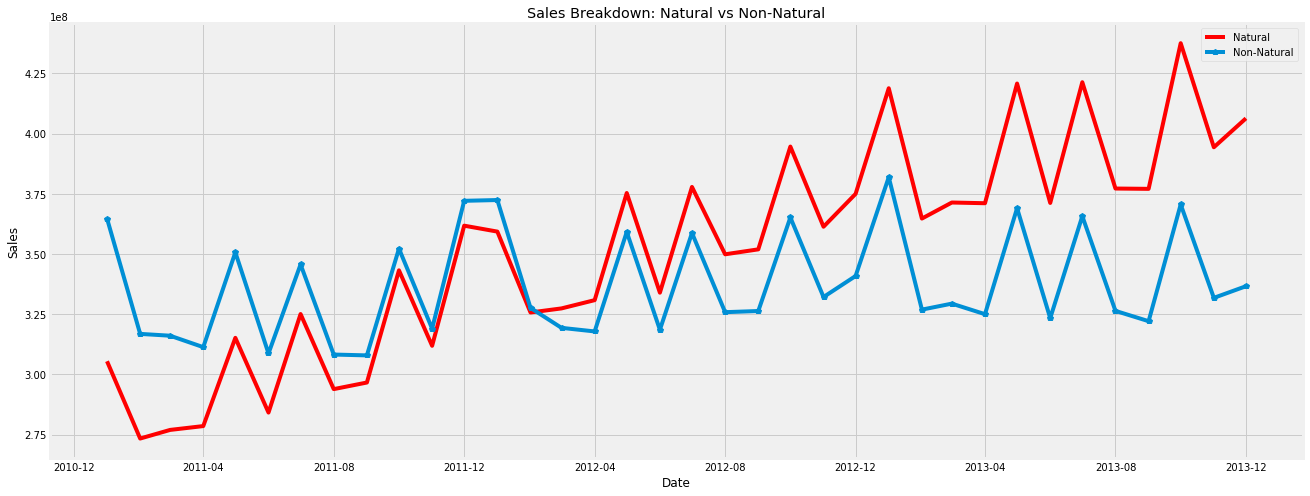

In [39]:
plt.figure(figsize=(20, 8))
plt.plot(store['Date'], store['Natural_sales'], 'r-', label = 'Natural')
plt.plot(store['Date'], store['Non_Natural_sales'], 'p-', label = 'Non-Natural')
plt.xlabel('Date'); plt.ylabel('Sales'); plt.title('Sales Breakdown: Natural vs Non-Natural')
plt.legend();

In [40]:
first_date = store.ix[np.min(list(np.where(store['Natural_sales'] > store['Non_Natural_sales'])[0])), 'Date']
print("Natural Pet Food first had higher sales than Non-Natural on {}.".format(first_date.date()))

Natural Pet Food first had higher sales than Non-Natural on 2012-03-01.


ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

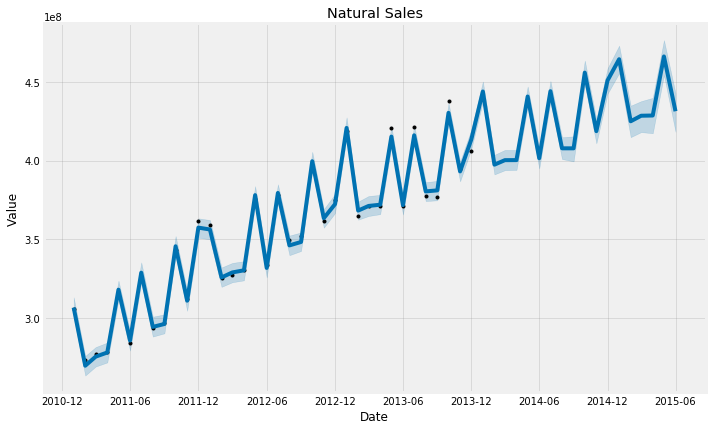

In [41]:
#Time Series Modeling with Prophet
from fbprophet import Prophet

Natural = Natural.rename(columns={'Date': 'ds', 'Value': 'y'})
Natural_model = Prophet(interval_width=0.95)
Natural_model.fit(Natural)

Non_Natural = Non_Natural.rename(columns={'Date': 'ds', 'Value': 'y'})
Non_Natural_model = Prophet(interval_width=0.95)
Non_Natural_model.fit(Non_Natural)

Natural_forecast = Natural_model.make_future_dataframe(periods=18, freq='MS')
Natural_forecast = Natural_model.predict(Natural_forecast)

Non_Natural_forecast = Non_Natural_model.make_future_dataframe(periods=18, freq='MS')
Non_Natural_forecast = Non_Natural_model.predict(Non_Natural_forecast)

plt.figure(figsize=(18, 6))
Natural_model.plot(Natural_forecast, xlabel = 'Date', ylabel = 'Value')
plt.title('Natural Sales');

<Figure size 1296x432 with 0 Axes>

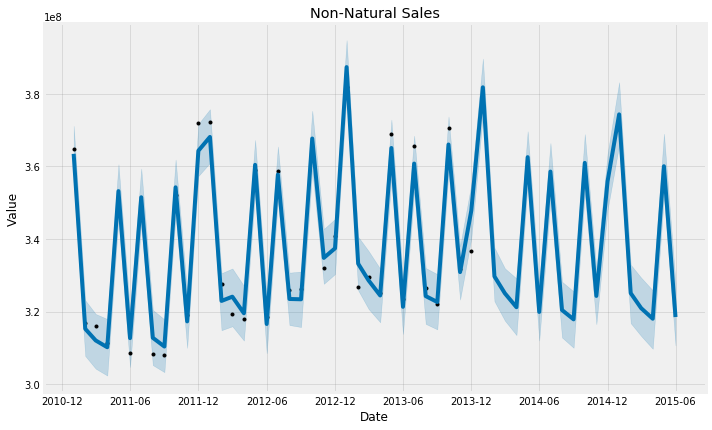

In [42]:
plt.figure(figsize=(18, 6))
Non_Natural_model.plot(Non_Natural_forecast, xlabel = 'Date', ylabel = 'Value')
plt.title('Non-Natural Sales');

In [43]:
Natural_names = ['Natural_%s' % column for column in Natural_forecast.columns]
Non_Natural_names = ['Non_Natural_%s' % column for column in Non_Natural_forecast.columns]

merge_Natural_forecast = Natural_forecast.copy()
merge_Non_Natural_forecast = Non_Natural_forecast.copy()

merge_Natural_forecast.columns = Natural_names
merge_Non_Natural_forecast.columns = Non_Natural_names

forecast = pd.merge(merge_Natural_forecast, merge_Non_Natural_forecast, how = 'inner', left_on = 'Natural_ds', right_on = 'Non_Natural_ds')

forecast = forecast.rename(columns={'Natural_ds': 'Date'}).drop('Non_Natural_ds', axis=1)
forecast.head()

,Date,Natural_trend,Natural_yhat_lower,Natural_yhat_upper,Natural_trend_lower,Natural_trend_upper,Natural_additive_terms,Natural_additive_terms_lower,Natural_additive_terms_upper,Natural_yearly,...,Non_Natural_additive_terms,Non_Natural_additive_terms_lower,Non_Natural_additive_terms_upper,Non_Natural_yearly,Non_Natural_yearly_lower,Non_Natural_yearly_upper,Non_Natural_multiplicative_terms,Non_Natural_multiplicative_terms_lower,Non_Natural_multiplicative_terms_upper,Non_Natural_yhat
0,2011-01-01,2.774983e+08,3.007884e+08,3.131608e+08,2.774983e+08,2.774983e+08,2.917442e+07,2.917442e+07,2.917442e+07,2.917442e+07,...,3.893074e+07,3.893074e+07,3.893074e+07,3.893074e+07,3.893074e+07,3.893074e+07,0.0,0.0,0.0,3.634857e+08
1,2011-02-01,2.823189e+08,2.635321e+08,2.759362e+08,2.823189e+08,2.823189e+08,-1.254855e+07,-1.254855e+07,-1.254855e+07,-1.254855e+07,...,-1.010146e+07,-1.010146e+07,-1.010146e+07,-1.010146e+07,-1.010146e+07,-1.010146e+07,0.0,0.0,0.0,3.152231e+08
2,2011-03-01,2.866730e+08,2.692537e+08,2.815940e+08,2.866730e+08,2.866730e+08,-1.114960e+07,-1.114960e+07,-1.114960e+07,-1.114960e+07,...,-1.400273e+07,-1.400273e+07,-1.400273e+07,-1.400273e+07,-1.400273e+07,-1.400273e+07,0.0,0.0,0.0,3.120169e+08
3,2011-04-01,2.914936e+08,2.718545e+08,2.844429e+08,2.914936e+08,2.914936e+08,-1.334432e+07,-1.334432e+07,-1.334432e+07,-1.334432e+07,...,-1.664708e+07,-1.664708e+07,-1.664708e+07,-1.664708e+07,-1.664708e+07,-1.664708e+07,0.0,0.0,0.0,3.101421e+08
4,2011-05-01,2.961587e+08,3.118045e+08,3.237482e+08,2.961587e+08,2.961587e+08,2.188675e+07,2.188675e+07,2.188675e+07,2.188675e+07,...,2.567281e+07,2.567281e+07,2.567281e+07,2.567281e+07,2.567281e+07,2.567281e+07,0.0,0.0,0.0,3.532068e+08


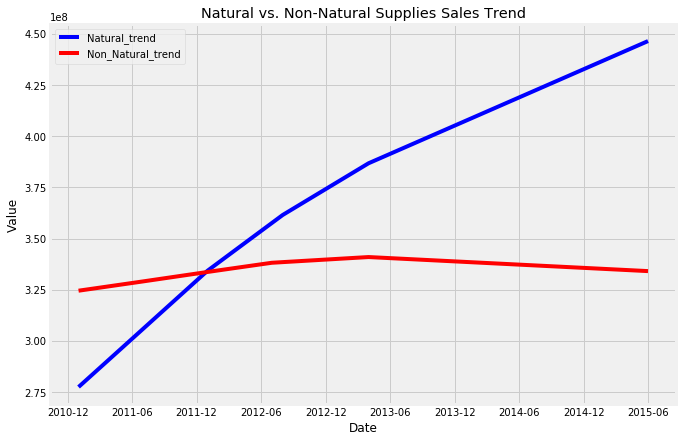

In [44]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Natural_trend'], 'b-')
plt.plot(forecast['Date'], forecast['Non_Natural_trend'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Value')
plt.title('Natural vs. Non-Natural Supplies Sales Trend');

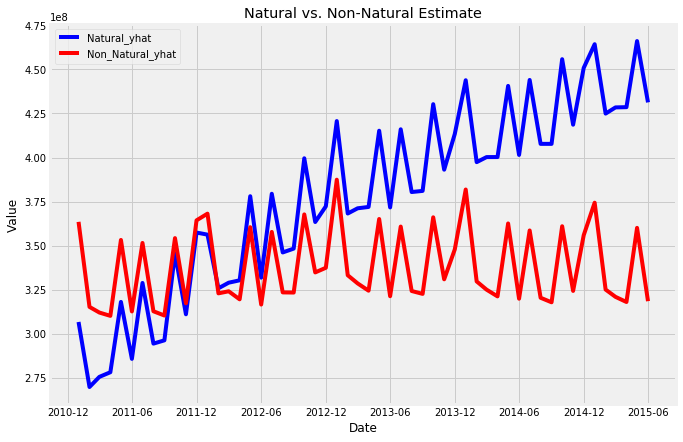

In [45]:
plt.figure(figsize=(10, 7))
plt.plot(forecast['Date'], forecast['Natural_yhat'], 'b-')
plt.plot(forecast['Date'], forecast['Non_Natural_yhat'], 'r-')
plt.legend(); plt.xlabel('Date'); plt.ylabel('Value')
plt.title('Natural vs. Non-Natural Estimate');